# 과제 001

주어진 함수를 이용하여 gradient descent 를 직접 구현하고 그래프를 그리시오.


**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```
def f(x):
    return x**4 - 3*x**3 +2

def fprime(x):
    h = 0.001
    return (f(x+h) - f(x))/h
```

* 힌트: 교과서 44p를 **참고**

최종해 k=336: f(2.250152587890625)=-6.542968514237657
[f(0), f(9/4), f(-2), f(4)]= [2, -6.54296875, 42, 66]


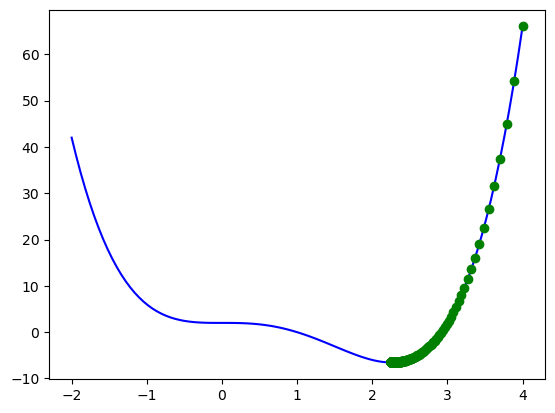

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 함수
def f(x):
    return x**4 - 3*x**3 +2

def fprime(x): # forward difference
    h = 0.001
    return (f(x+h) - f(x))/h

# 조건
k = 0 # 반복 횟수 초기화
mi = 1000 # 최대 반복학습률
lr = 0.001 # 반복 학습률
tol = 1e-5 # 허용오차 크기(종료조건)

xb = 0.0 # 변경 전 x값
xa = 4.0  # 변경 후 x값
xlist= [xa]  # x 값 저장
x = tf.Variable(xa, dtype = tf.float32) # 변수 생성 및 초깃값 설정

while abs(xb-xa)>tol and  k < mi:
    k+=1
    xb= x.numpy() # x 값을 Numpy 배열로 변환
    st = lr * fprime(x)
    x.assign_sub(st, read_value=False) # 값 업데이트(x값 읽지 않음)
    xa= x.numpy()
    xlist.append(xa)

print('최종해','k={}: f({})={}'.format(k, xa, f(xa)))
print("[f(0), f(9/4), f(-2), f(4)]=", [f(0), f(9/4), f(-2), f(4)])
# 그래프 그리기
# f(X)
xs = tf.linspace(-2.0, 4.0, num = 101) # Tensor  
ys = f(xs)
plt.plot(xs, ys,  'b-')

# 결과 값
xlist =tf.constant(xlist, dtype=tf.float32)  # Tensor
y_list = f(xlist) 
plt.plot(xlist, y_list, 'go')
plt.show()
    

# 과제 002

주어진 보스톤 주택 가격 데이터 셋을 이용하여 주택 가격을 예측하는 multiple variables regression 을 수행하는 프로그램을 직접 작성하시오.

단, 아래 조건을 만족하여 구현하시오.

* loss 함수: tensorflow 의 MSE
* gradient 계산: tensorflow의 GradientTape()
* optimizer: tensorflow의 Adam

**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```python
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
# features 설명 (http://lib.stat.cmu.edu/datasets/boston)
# 보스톤 주택 가격(MEDV) 예측 (1인당 범죄율, 주택당 평균 방 개수, 학생대 교사 비율 등의 features 이용함)
# MEDV(주택 가격 중앙값, 단위: $1,000)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
df.head()
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')
```

* 힌트:
https://dschloe.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/

x_train.shape :  (404, 13)  / y_train.shape :  (404,)  / x_test.len :  102  / y_test.len :  102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


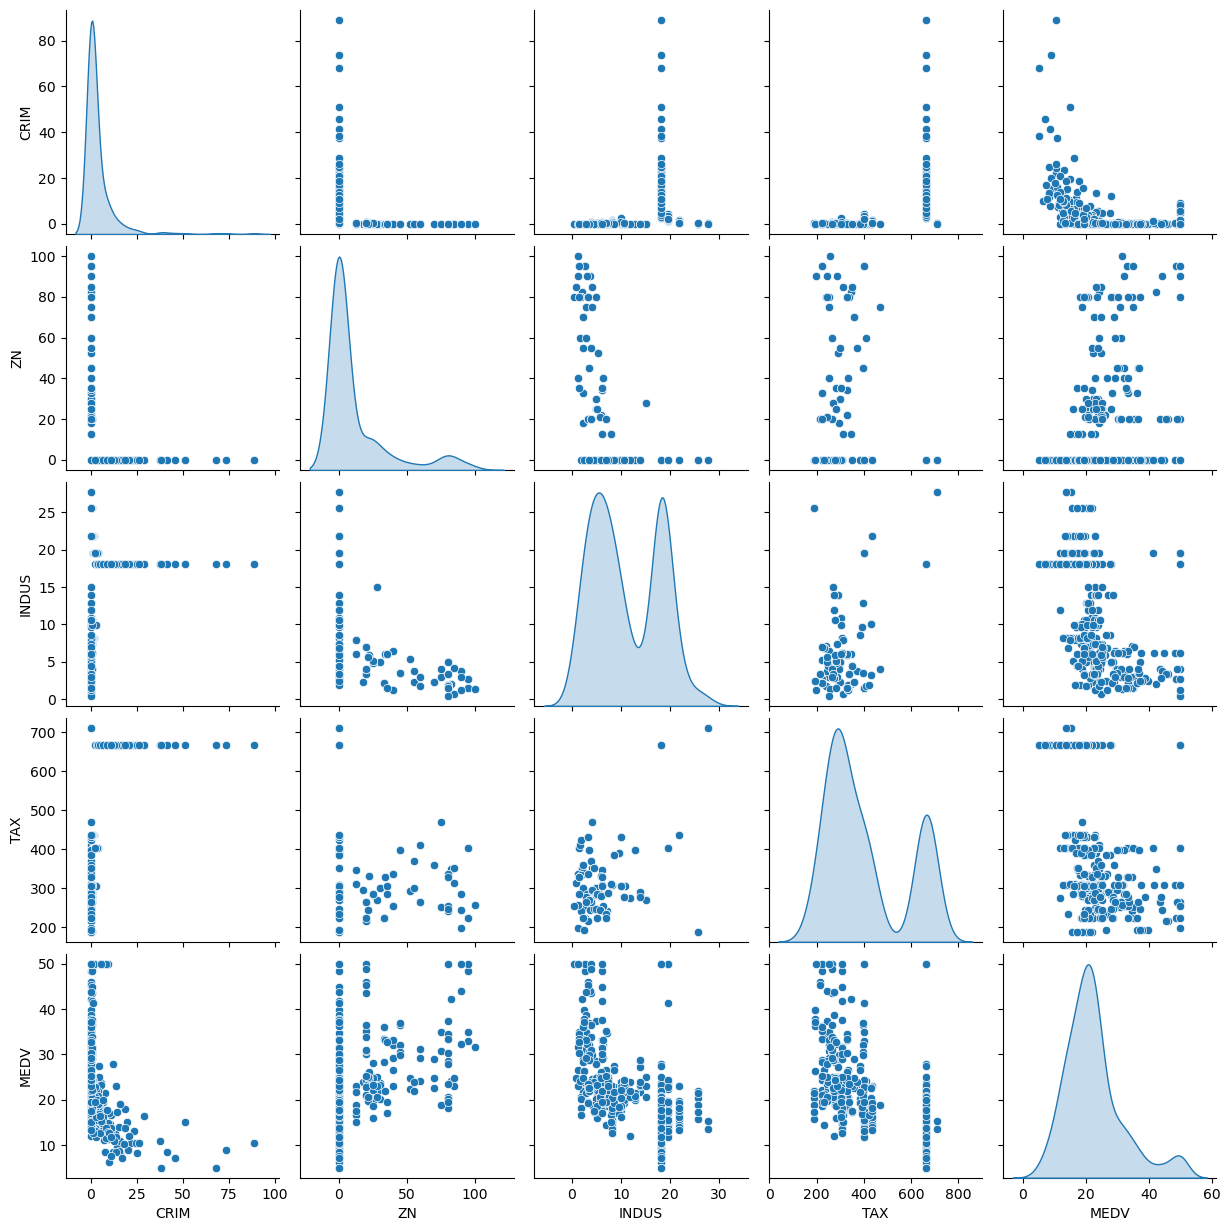

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 데이터 가져오기
# train : 훈련 데이터, test : 테스트데이터
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=113)
print('x_train.shape : ', x_train.shape, ' / y_train.shape : ', y_train.shape, ' / x_test.len : ', len(x_test), ' / y_test.len : ', len(y_test) )
print(x_train[0])
print(y_train[0])

# 데이터 전처리
all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
df.head()

# 데이터 시각화
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')
plt.show()

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 모델 컴파일


# 모델 학습


# 예측 결과


# 예측 결과 시각화

